In [540]:
# Only bp on weight matrix, to find out what the final solution should be like
# Do backprop on each datapoint, better than backprop for each epoch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from training_abb05_wt import SimpleNeuralNetwork
from tqdm import tqdm

In [541]:
# load the pickle file
with open('weights_abb05_wt.pkl', 'rb') as f:
    model_wt = pickle.load(f)
    losses = pickle.load(f)
    weight_sums = pickle.load(f)
    weights = pickle.load(f)
epochs = len(losses)

In [542]:
ndata = 200
xs = torch.linspace(0, 2 * torch.pi, ndata)
ys = torch.cos(xs)/4 + 0.5

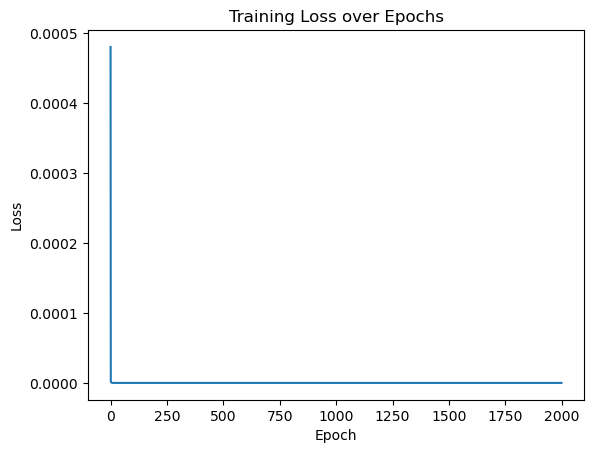

In [543]:
# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0,0.1])
plt.title('Training Loss over Epochs')
# plt.savefig('abb05_loss.png')
plt.show()

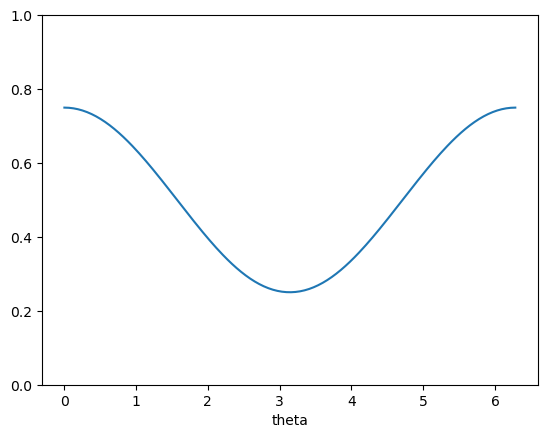

In [544]:
# Plotting the outputs
model_wt.eval()
outputs = []
for x in xs:
    output = model_wt(x)
    outputs.append(output.item())
plt.plot(xs, outputs)
plt.ylim([0,1])
plt.xlabel("theta")
# plt.savefig('abb05_outputs.png')
plt.show()

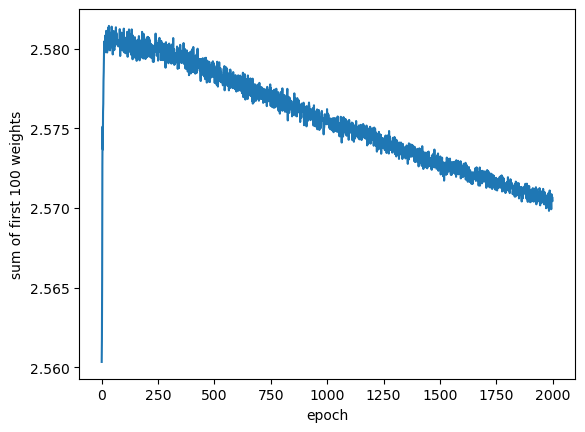

In [545]:
plt.plot(np.arange(epochs), weight_sums)
# plt.ylim([0,8])
plt.xlabel("epoch")
plt.ylabel("sum of first 100 weights")
# plt.savefig('abb05_ws.png')
plt.show()

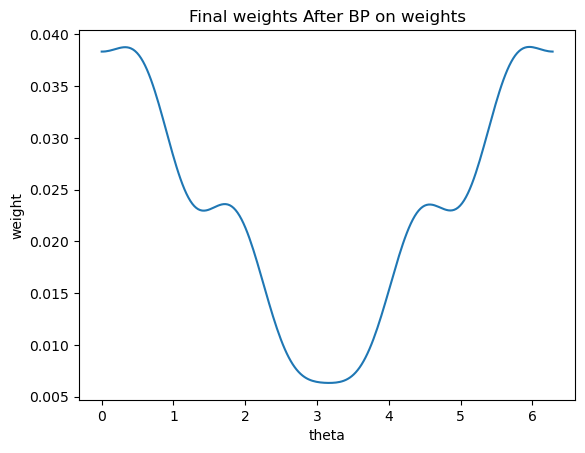

In [546]:
final_weight = weights[-1].flatten()
plt.plot(np.linspace(0, 2 * np.pi, model_wt.input_size), final_weight)
# plt.ylim([0,8])
plt.xlabel("theta")
plt.ylabel("weight")
plt.title("Final weights After BP on weights")
# plt.savefig('fig/0122_abb05_wt_weights.png')
plt.show()

In [547]:
1 / np.linalg.norm(final_weight, None)**2

6.600114145027885

In [548]:
rates = []
for x in xs:
    input = model_wt.gaussian_rf(x)
    rate = model_wt.activation_func(model_wt.gain * (input - model_wt.shift))
    rates.append(rate)
rates = torch.cat(rates, dim=1)
rates = rates.detach().numpy().round(4)
rates

array([[0.5   , 0.4996, 0.4985, ..., 0.4985, 0.4996, 0.5   ],
       [0.4997, 0.5   , 0.4995, ..., 0.4969, 0.4987, 0.4997],
       [0.4989, 0.4998, 0.5   , ..., 0.4948, 0.4972, 0.4989],
       ...,
       [0.4989, 0.4972, 0.4948, ..., 0.5   , 0.4998, 0.4989],
       [0.4997, 0.4987, 0.4969, ..., 0.4995, 0.5   , 0.4997],
       [0.5   , 0.4996, 0.4985, ..., 0.4985, 0.4996, 0.5   ]],
      dtype=float32)

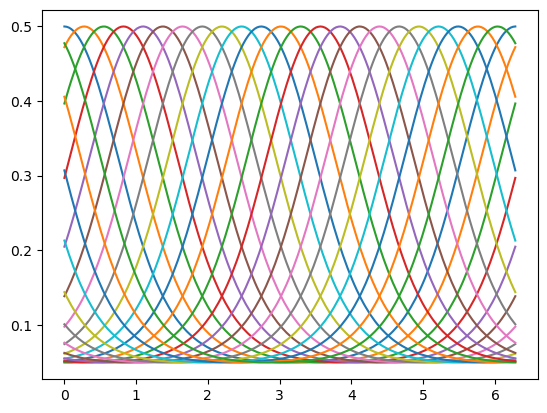

In [549]:
for i in np.arange(0,model_wt.input_size,10):
    thisr = rates[i,:]
    plt.plot(xs, thisr)
plt.show()